In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ztfrapid import ztf_rapid

You will need to install 'emcee' if you wish to train your own classifier on new data.


In [2]:
input_filepath = '/home/nmiranda/workspace/ztf_rapid/data/processed/test_none/test_none.npz'
files = np.load(input_filepath, allow_pickle=True)

In [30]:
idx = 100
files['objids_test'][idx]

'1_ZTF19aanfyey'

In [4]:
this_lc = files['orig_lc_test'][idx]
this_lc

passband,time,flux,fluxErr,photflag
str1,float32,float32,float32,int64
g,0.0197,169.0441,20.240396,4096
g,5.021,325.0873,32.93581,4096
g,8.0403,359.74933,23.193897,4096
g,12.9713,343.55795,31.642857,4096
g,12.9983,337.28732,24.852247,4096
g,17.9675,253.51286,28.019278,4096
g,18.9374,239.88329,26.51288,4096
g,24.9725,145.88142,41.652145,4096
g,30.0198,75.85776,13.274839,4096


In [15]:
timesX_test = files['timesX_test'][idx]
timesX_test

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [19]:
argmax = timesX_test.argmax() + 1
timesX_test[:argmax]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41.])

In [22]:
X_test = files['X_test'][idx]
X_test

array([[  0.        ,   0.        ,   0.        ],
       [199.62997437,   0.        ,   0.        ],
       [230.83050537,   0.        ,   0.        ],
       [262.03103638,   0.        ,   0.        ],
       [293.23156738,   0.        ,   0.        ],
       [324.43209839,   0.        ,   0.        ],
       [336.3263855 , 342.40921021,   0.        ],
       [347.80651855, 366.6918335 ,   0.        ],
       [359.28668213, 390.79946899,   0.        ],
       [356.5980835 , 383.26776123,   0.        ],
       [353.31448364, 375.73608398,   0.        ],
       [350.03088379, 368.20437622,   0.        ],
       [346.74731445, 360.67266846,   0.        ],
       [337.25866699, 353.20159912,   0.        ],
       [320.39993286, 356.4934082 ,   0.        ],
       [303.54116821, 359.51306152,   0.        ],
       [286.68243408, 337.83572388,   0.        ],
       [269.82369995, 328.4364624 ,   0.        ],
       [253.0561676 , 319.35586548,   0.        ],
       [238.9082489 , 310.23287

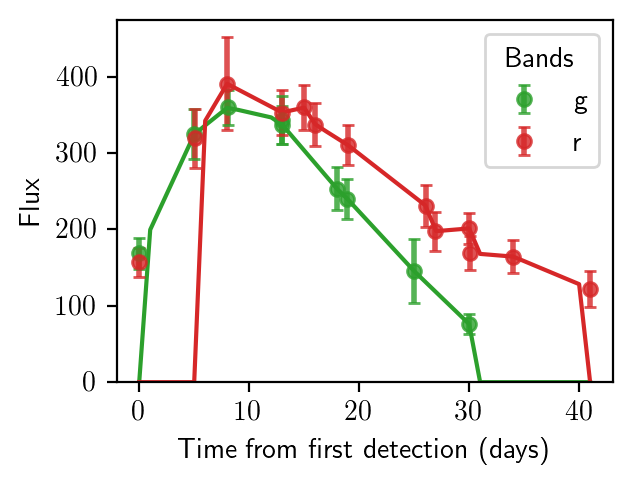

In [29]:
fig = plt.figure(figsize=(3.2, 2.4), dpi=200)

for pbidx, pb in enumerate(ztf_rapid.BANDS.values()):
    if pb not in set(this_lc['passband']):
        continue
    pbmask = this_lc['passband'] == pb
    plt.errorbar(
        this_lc[pbmask]['time'],
        this_lc[pbmask]['flux'],
        yerr=this_lc[pbmask]['fluxErr'],
        fmt='o',
        label=pb,
        lw=2,
        markersize=5,
        alpha=0.8,
        capsize=2.0,
        c=ztf_rapid.COLPB[pb]
    )

    plt.plot(timesX_test[:argmax], X_test[:,pbidx][:argmax], c=ztf_rapid.COLPB[pb])

plt.ylim(bottom=0.0)
plt.ylabel('Flux')
plt.xlabel('Time from first detection (days)')
plt.legend(loc='upper right', title='Bands')